# Métodos Estadísticos para invertir en la bolsa de valores con Phyton
# M.C. Ernesto Álvarez González
# Facultad de Contaduría y Administración de la
# Universidad Autónoma "Benito Juárez" de Oaxaca
# Mayo 2023

# Índice de temas:
# 1) Ambiente Python
# 1.1) librerías y sus métodos
# 1.2) funciones
# 2) Definición de una acción.
# 3) Bolsas de valores.
# 4) Definición de rendimiento o retorno. Rendimiento logarítmico, retorno logarítmico.
# 5) Distribución de retornos logarítmicos.
# 5.1) Valor promedio y varianza (volatilidad).
# 6) Prueba de normalidad de la distribución de retornos logarítmicos.
# 7) Ajuste mormal.
# 8) cuartiles
# 9) Interpretación.

#  1) Ambiente Python
# 1.1) librerías y sus métodos

In [ ]:
import math

In [ ]:
math.log(5)

1.6094379124341003

In [ ]:
math.fabs(-3)

3.0

In [ ]:
math.factorial(4)

24

In [ ]:
math.isqrt(16)

4

In [ ]:
import numpy as np
# numpy trabaja con arreglos

In [ ]:
lista1 = [1,2,3,4,6,9]

In [ ]:
nplista1 = np.array(lista1)
nplista1

array([1, 2, 3, 4, 6, 9])

In [ ]:
nparreglo_con_texto = np.array(['este',"es",'un','ejemplo'])
nparreglo_con_texto

array(['este', 'es', 'un', 'ejemplo'], dtype='<U7')

In [ ]:
matriz1 = [[2,1],[1,0]]
npmatriz1 = np.array(matriz1)
npmatriz1[0]

array([2, 1])

In [ ]:
npmatriz1[1]

array([1, 0])

In [ ]:
npmatriz1[0][0]

2

In [ ]:
npceros = np.zeros(5)
npceros

array([0., 0., 0., 0., 0.])

In [ ]:
npdatos = np.array([10,9,8,8,6,5,9,9])

In [ ]:
npdatos

array([10,  9,  8,  8,  6,  5,  9,  9])

In [ ]:
#el promedio:
np.mean(npdatos)

8.0

In [ ]:
# desviación estándar
np.std(npdatos)

1.5811388300841898

In [ ]:
import pandas as pd
# pandas trabaja con series y dataframes

# series

In [ ]:
pdmaterias = pd.Series(["Matemáticas","Español","Historia","Geografía"])
pdmaterias

0    Matemáticas
1        Español
2       Historia
3      Geografía
dtype: object

# diccionarios

In [ ]:
pdmaterias_d = pd.Series({"Matemáticas": 9, "Español": 7, "Historia": 2, "Geografía": 10})
pdmaterias_d

Matemáticas     9
Español         7
Historia        2
Geografía      10
dtype: int64

# Acceso a un elemento de un diccionario que tiene etiqueta T
# s["T"]

In [ ]:
pdmaterias_d["Matemáticas"]

9

In [ ]:
pdmaterias_d["Historia"]

2

# acceso al i-ésimo elemento de una serie
# s.iloc[i]

In [ ]:
pdmaterias.iloc[0]

'Matemáticas'

In [ ]:
pdmaterias_d.iloc[0]

9

In [ ]:
pdmaterias_d.iloc[3]

10

In [ ]:
pdserienumerica = pd.Series([4,9,16,25,65])
pdserienumerica

0     4
1     9
2    16
3    25
4    65
dtype: int64

# Aplicar una función f a los elementos de una serie
# s.apply(f)

In [ ]:
pdserienumerica.apply(math.sqrt)

0    2.000000
1    3.000000
2    4.000000
3    5.000000
4    8.062258
dtype: float64

# Filtrar una serie:
# s[condición]

In [ ]:
pdmaterias_d

Matemáticas     9
Español         7
Historia        2
Geografía      10
dtype: int64

In [ ]:
print(pdmaterias_d[pdmaterias_d > 8])

Matemáticas     9
Geografía      10
dtype: int64


# Ordenar una seria de acuerdo al valor
# s.sort_values(ascending = booleano)

In [ ]:
pdmaterias_d.sort_values(ascending = True)

Historia        2
Español         7
Matemáticas     9
Geografía      10
dtype: int64

In [ ]:
pdmaterias_d.sort_values(ascending = False)

Geografía      10
Matemáticas     9
Español         7
Historia        2
dtype: int64

# Definir funciones
# def name(arg1,arg2,...):
# return operaciones dependientes de los argumentos

In [ ]:
def saludar(x):
    return print("Hola",x)

In [ ]:
saludar("Yos")

Hola Yos


In [ ]:
saludar("Karla")

Hola Karla


# Dataframes
# DataFrame(data=diccionario)

In [ ]:
pddataframe1 = pd.DataFrame({"Nombre":["Ana", "Mario", "Rogelio", "Luz"],
                            "edad":[21,23,42,26]})
pddataframe1

,Nombre,edad
0,Ana,21
1,Mario,23
2,Rogelio,42
3,Luz,26


In [ ]:
pddata1 = {"Nombre":["Ana", "Mario", "Rogelio", "Luz"],
                            "edad":[21,23,42,26]}
pd.DataFrame(pddata1)

,Nombre,edad
0,Ana,21
1,Mario,23
2,Rogelio,42
3,Luz,26


# Dataframes
# DataFrame(data=lista de listas, index=índices, columns=columnas)

In [ ]:
pddata2 = [["Ana", 21], ["Mario",23], ["Rogelio",42], ["Luz",26]]
pd.DataFrame(pddata2,index=["primero","segundo","tercero","cuarto"],columns=["Nombre","Edad"])

,Nombre,Edad
primero,Ana,21
segundo,Mario,23
tercero,Rogelio,42
cuarto,Luz,26


# Dataframes
# DataFrame(data=lista de diccionarios)

In [ ]:
pddata3 = [{"Nombre":"Ana","Edad":21},{"Nombre":"Mario","Edad":23},{"Nombre":"Rogelio","Edad":42},{"Nombre":"Luz","Edad":26}]
pd.DataFrame(pddata3)

,Nombre,Edad
0,Ana,21
1,Mario,23
2,Rogelio,42
3,Luz,26


# Creación de un Dataframe a partir de un archivo con extensión xlsx o csv
# read_csv(fichero.csv, sep=separador, header=n, index_col=m, na_values=no-validos, decimal=separador-decimal)
# read_excel(fichero.xlsx, sheet_name=hoja, header=n, index_col=m, na_values=no-validos, decimal=separador-decimal)

In [ ]:
pd.read_excel("ejemplo_excel.xlsx")

,Nombre,Edad
0,Ana,21
1,Mario,23
2,Rogelio,42
3,Luz,26


In [ ]:
pd.read_excel("C:/Users/Ernesto Alvarez Gonz/Desktop/curso Tecnicas Inversion Python/ejemplo_excel.xlsx")

,Nombre,Edad
0,Ana,21
1,Mario,23
2,Rogelio,42
3,Luz,26


In [ ]:
pdexcel1 = pd.read_excel("C:/Users/Ernesto Alvarez Gonz/Desktop/curso Tecnicas Inversion Python/ejemplo_excel.xlsx")

# Acceso a un DataFrame mediante posiciones
# DataFrame.iloc[i,j]

In [ ]:
pdexcel1.iloc[0,0]

'Ana'

In [ ]:
pdexcel1.iloc[0,1]

21

# Acceso a un DataFrame mediante nombres
# DataFrame.loc[fila,columna]
# DataFrame.loc[lista filas,lista columnas]
# DataFrame[columna]
# DataFrame.columna

In [ ]:
pdexcel1.Nombre

0        Ana
1     Mario 
2    Rogelio
3        Luz
Name: Nombre, dtype: object

In [ ]:
pdexcel1.Edad

0    21
1    23
2    42
3    26
Name: Edad, dtype: int64

In [ ]:
lista_excel = ["Nombre","Edad"]
pdexcel1.loc[[0],lista_excel]

,Nombre,Edad
0,Ana,21


In [ ]:
pdexcel1.loc[[0,3],lista_excel]

,Nombre,Edad
0,Ana,21
3,Luz,26


In [ ]:
# librería yfinance
import yfinance as yf

# Descargar índices financieros
# yf.download("siglas de empresa","0000-00-00","0000-00-00")
# empresa.history("0000-00-00","0000-00-00")

In [ ]:
TESLA = yf.download("TSLA","2023-01-01","2023-05-31")

[*********************100%***********************]  1 of 1 completed


In [ ]:
TESLA

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000
...,...,...,...,...,...,...
2023-05-23,186.199997,192.960007,185.259995,185.770004,185.770004,156952100
2023-05-24,182.229996,184.220001,178.220001,182.899994,182.899994,137605100
2023-05-25,186.539993,186.779999,180.580002,184.470001,184.470001,96870700


# Segunda opción para descargar índices financieros:
# name = yf.Ticker("siglas empresa")
# name.history(period = "temporalidad 1d, 5mo, 2y, max")

In [ ]:
TESLA1 = yf.Ticker("TSLA")
TESLA1.history(period = "5m")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-31 00:00:00-04:00,199.779999,202.990005,195.119995,198.775803,92856099,0.0,0.0


In [ ]:
TESLA1.info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. It operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; purchase financing and leasing services; services for electric vehicles through its compa

In [ ]:
precios_cierre = TESLA["Close"]

In [ ]:
c_prices = []
for i in range(len(precios_cierre)):
    c_prices.append(precios_cierre.iloc[i])

<Axes: xlabel='Date'>

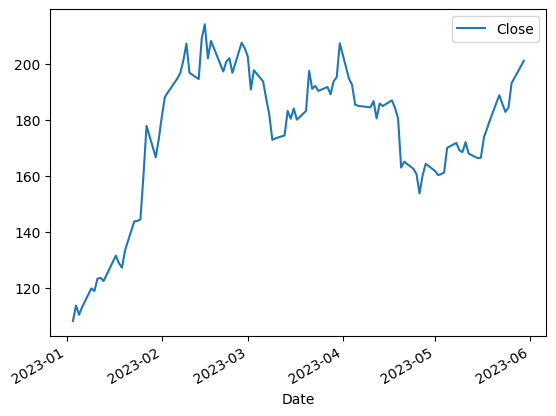

In [ ]:
TESLA.plot(y="Close")

In [ ]:
log_return_TESLA = [math.log(c_prices[t]/c_prices[t-1]) for t in range(1,len(c_prices)-1)]

In [ ]:
avrg_return = np.mean(log_return_TESLA)
avrg_return

0.005805139102094974

In [ ]:
volatilityTESLA = np.std(log_return_TESLA)
volatilityTESLA

0.03650605610025199

In [ ]:
log_return_TESLA.sort()
def normal(x,MU,STD):
    return (1/(math.sqrt(2*math.pi)*STD)*(math.exp(-(x-MU)**2/(2*STD**2))))

In [ ]:
ajuste_normal = [normal(x,avrg_return,volatilityTESLA) for x in log_return_TESLA]

In [ ]:
import matplotlib.pyplot as plt

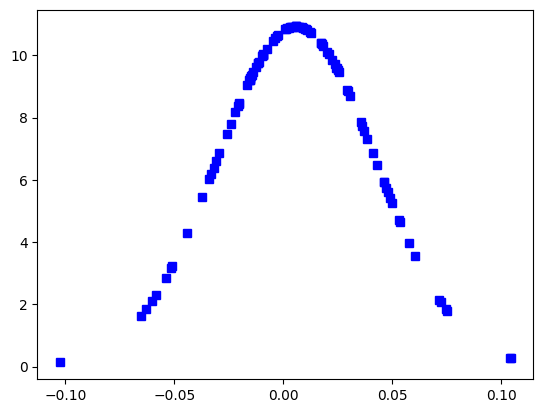

In [ ]:
normal_fit = [plt.plot(log_return_TESLA[i],normal(log_return_TESLA[i],avrg_return,volatilityTESLA),"bs") for i in range(len(log_return_TESLA))]

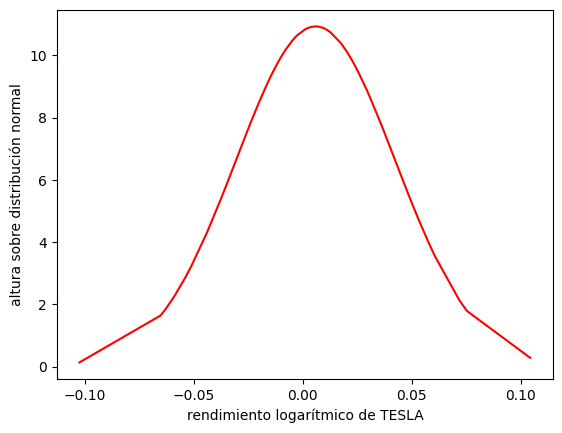

In [ ]:
plt.plot(log_return_TESLA,ajuste_normal,color="red")
plt.ylabel("altura sobre distribución normal")
plt.xlabel("rendimiento logarítmico de TESLA")
plt.show()

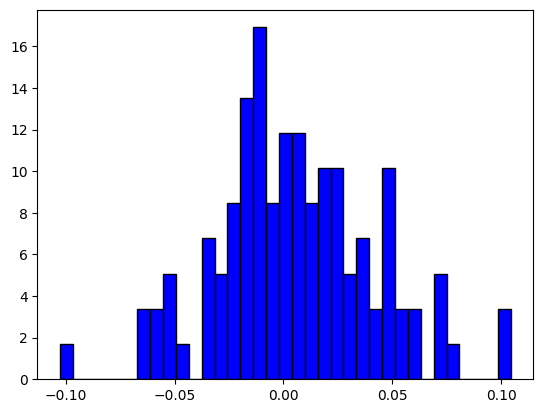

In [ ]:
dist_frecuencia = plt.hist(log_return_TESLA,density=1,bins=35,edgecolor="black",color="blue")

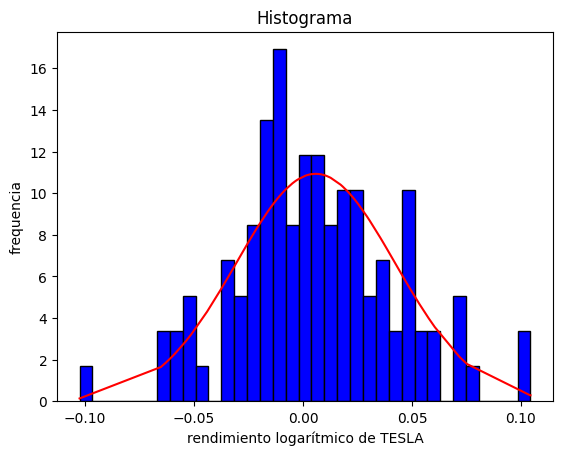

In [ ]:
plt.plot(log_return_TESLA,ajuste_normal,color="red")
plt.hist(log_return_TESLA,density=1,bins=35,edgecolor="black",color="blue")
plt.title("Histograma")
plt.ylabel("frequencia")
plt.xlabel("rendimiento logarítmico de TESLA")
plt.show()

# Suponiendo que la distribución de frecuencias para el rendimiento logarítmico de los
# precios de las acciones de TESLA, durante el plazo del primero de enero de 2023
# hasta el 31 de mayo del presente año, se explica con una distribución normal
# media = 0.005805139102094974 y desviación estándar = 0.03650605610025199,
# ¿qué tan probable es que nuestras acciones se mantengan en un nivel de rendimiento logarítmico entre
# 0.005 y 0.006 en un día cualquiera elegido aleatoriamente?

In [ ]:
import sympy as sp

In [ ]:
def f(x):
    return x**2-x

In [ ]:
f(3)

6

In [ ]:
x = sp.symbols("x", real = True)

In [ ]:
sp.integrate(x**2)

x**3/3

In [ ]:
sp.integrate(f(x))

x**3/3 - x**2/2

In [ ]:
sp.integrate(f(x), (x, 3,9))

198

In [ ]:
normal(0.1,avrg_return,volatilityTESLA)

0.391600064903013

In [ ]:
import scipy as sc

In [ ]:
from scipy.stats import norm

In [ ]:
norm.cdf(0)

0.5

In [ ]:
def z(x, MU, STD):
    return (x - MU)/STD

In [ ]:
norm.cdf(z(0.006,avrg_return,volatilityTESLA))-norm.cdf(z(0.005,avrg_return,volatilityTESLA))

0.010927388924503512

In [ ]:
Q1 = np.percentile(log_return_TESLA,25)
Q1

In [ ]:
Q2 = np.percentile(log_return_TESLA,50)
Q2

In [ ]:
Q3 = np.percentile(log_return_TESLA,75)
Q3

In [ ]:
Q3